In [1]:
# Import Statement - modified according to needs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# Import csv and delete all rows with null values.

df_DDS = pd.read_csv('californiaDDSDataV2.csv').dropna()
df_DDS.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [3]:
# Review of key data properties

df_DDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1000 non-null   int64 
 1   Age Cohort    1000 non-null   object
 2   Age           1000 non-null   int64 
 3   Gender        1000 non-null   object
 4   Expenditures  1000 non-null   int64 
 5   Ethnicity     1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [4]:
# By grouping we see that Hispanic and White seemingly dominates the total fundings

df_Ethn = df_DDS.groupby('Ethnicity')[['Expenditures']].sum()
df_Ethn.sort_values(by = 'Expenditures', ascending= False)

,Expenditures
Ethnicity,
White not Hispanic,9903717
Hispanic,4160654
Asian,2372616
Black,1232191
American Indian,145753
Native Hawaiian,128347
Multi Race,115875
Other,6633


In [5]:
# Create New Series indicating White, hipanic or others

df_DDS.loc[
            (df_DDS['Ethnicity'] == 'White not Hispanic')
            ,'EthBin'
            ] = 'White'
df_DDS.loc[
            (df_DDS['Ethnicity'] == 'Hispanic')
            ,'EthBin'
            ] = 'Hisbanic'
df_DDS.loc[
            ((df_DDS['Ethnicity'] != 'Hispanic') & (df_DDS['Ethnicity'] != 'White not Hispanic'))
            ,'EthBin'
            ] = 'Others'
df_DDS           


,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity,EthBin
0,10210,13 to 17,17,Female,2113,White not Hispanic,White
1,10409,22 to 50,37,Male,41924,White not Hispanic,White
2,10486,0 to 5,3,Male,1454,Hispanic,Hisbanic
3,10538,18 to 21,19,Female,6400,Hispanic,Hisbanic
4,10568,13 to 17,13,Male,4412,White not Hispanic,White
...,...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic,White
996,99715,18 to 21,20,Male,7494,Hispanic,Hisbanic
997,99718,13 to 17,17,Female,3673,Multi Race,Others
998,99791,6 to 12,10,Male,3638,Hispanic,Hisbanic


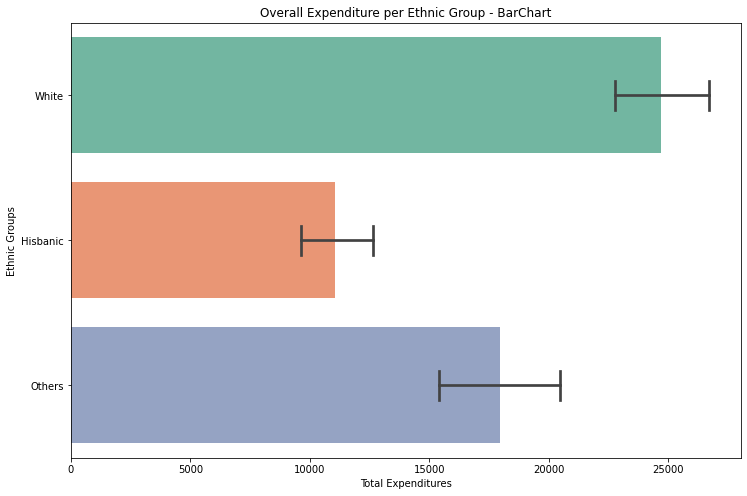

In [12]:
# Graph the overall expenditure by Ethnic Bins

plt.figure(figsize=(12,8))
sns.barplot(data = df_DDS
                ,x = 'Expenditures'
                ,y = 'EthBin'
                ,palette = 'Set2'
                ,capsize=.2
            )
plt.xlabel('Total Expenditures')
plt.ylabel('Ethnic Groups')
plt.title('Overall Expenditure per Ethnic Group - BarChart');

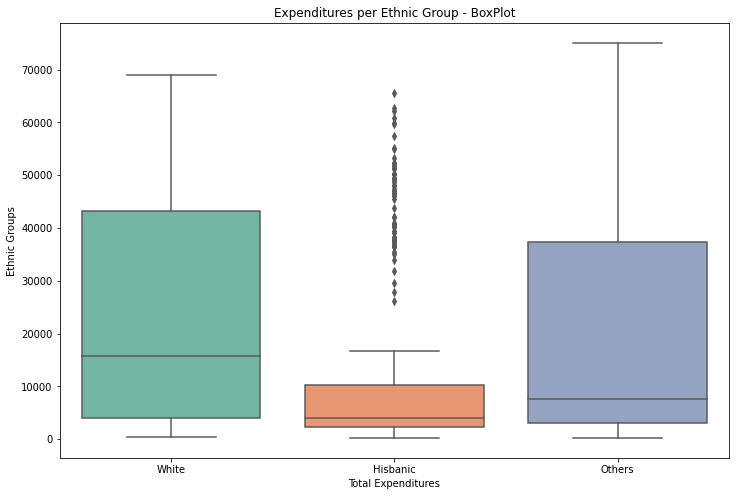

In [7]:
# Graph the above into boxplot, when the age variables are combined, there are significant difference in terms of expenditure
# White group received much more expenditure than others.

plt.figure(figsize=(12,8))
sns.boxplot(data = df_DDS
            ,x = 'EthBin'
            ,y = 'Expenditures'
            ,palette = 'Set2'
            )
plt.xlabel('Total Expenditures')
plt.ylabel('Ethnic Groups')
plt.title('Expenditures per Ethnic Group - BoxPlot');

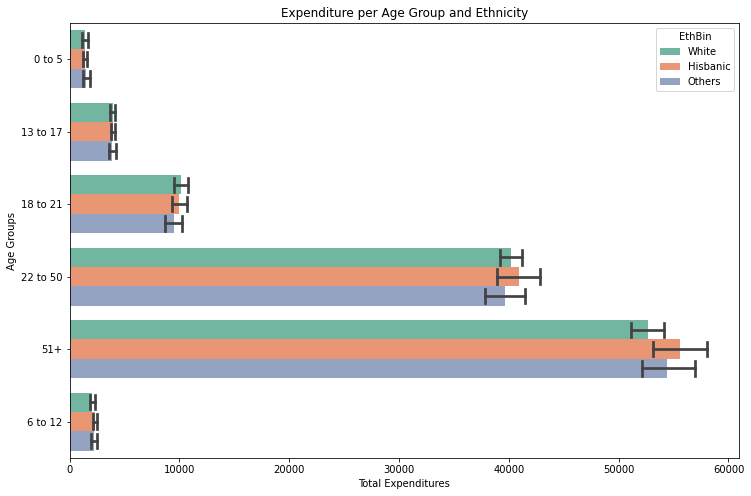

In [8]:
# Simpson's Paradox: when sorting results by age groups,
# then construct barplot showing expenditure with hue = ethnic groups.
sorted_result = df_DDS.groupby(
                                'Age Cohort'
                                )[[
                                    'Expenditures'
                                    ]].sum().reset_index().sort_values(
                                                                        'Age Cohort'
                                                                        )
plt.figure(figsize=(12,8))
sns.barplot(data = df_DDS
                ,x = 'Expenditures'
                ,y = 'Age Cohort'
                ,hue = 'EthBin'
                ,palette = 'Set2'
                ,capsize=.2
                ,order= sorted_result['Age Cohort']
                    )
plt.xlabel('Total Expenditures')
plt.ylabel('Age Groups')
plt.title('Expenditure per Age Group and Ethnicity');

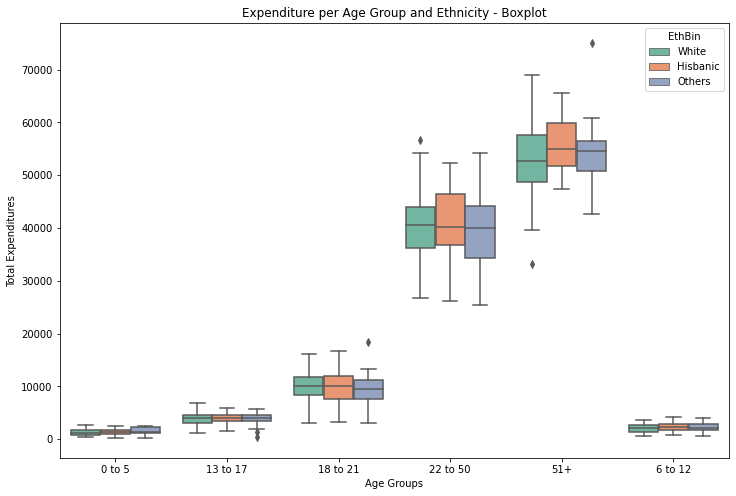

In [9]:
# Examine the same relationships in boxplot, show similar means

plt.figure(figsize=(12,8))
sns.boxplot(
            x="Age Cohort"
            , y="Expenditures"
            , hue = 'EthBin'
            , data = df_DDS
            , order= sorted_result['Age Cohort']
            , palette= 'Set2')
plt.xlabel('Age Groups')
plt.ylabel('Total Expenditures')
plt.title('Expenditure per Age Group and Ethnicity - Boxplot');

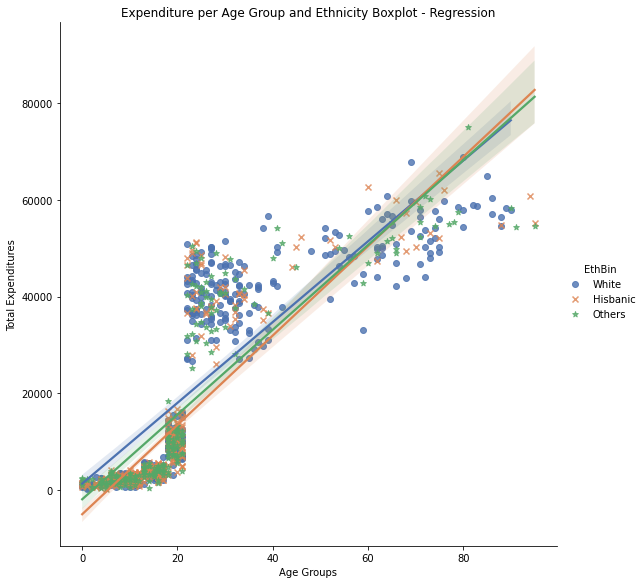

In [10]:
# There is no significant difference between age and expenditure in each ethnic group

sns.lmplot(
            x = "Age"
            ,y = "Expenditures"
            ,hue = 'EthBin'
            ,data = df_DDS
            ,markers=["o", "x", "*"]
            ,palette= 'deep'
            ,height=8
            ,aspect=1)
plt.xlabel('Age Groups')
plt.ylabel('Total Expenditures')
plt.title('Expenditure per Age Group and Ethnicity Boxplot - Regression');            

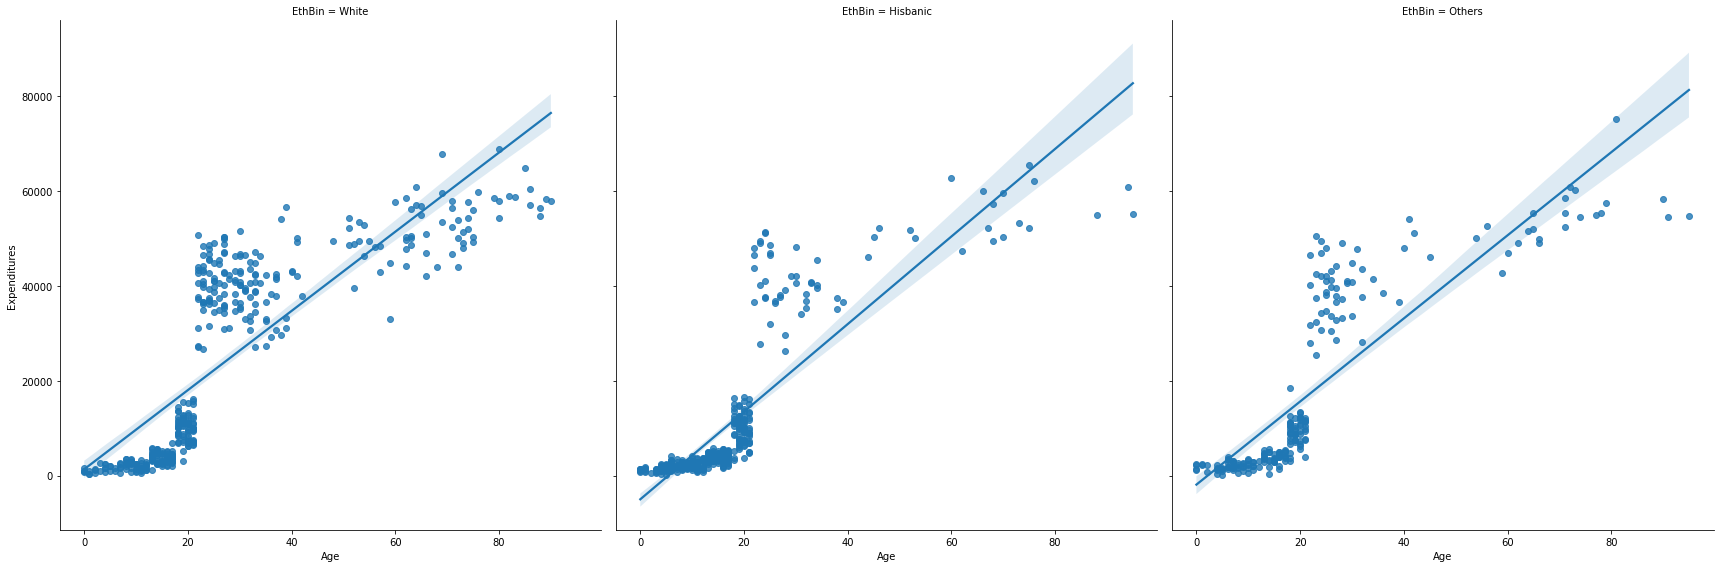

In [11]:
# To seperate the above regression into three columns:

sns.lmplot(
            x='Age'
            ,y='Expenditures'
            ,col = 'EthBin'
            ,data = df_DDS
            ,height=8
            ,aspect=1);